In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as tsa
from statsmodels.tsa.seasonal import STL, seasonal_decompose
import statsmodels.tools as smt

In [2]:
df = pd.read_csv('daily-min-temperatures.csv', header=0)

In [3]:
df.shape

(3650, 2)

In [4]:
df.columns

Index(['Date', 'Temp'], dtype='object')

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']

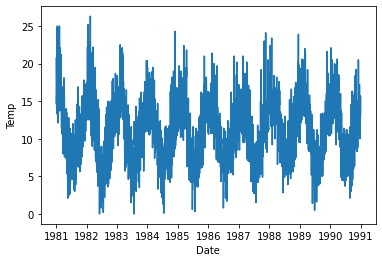

In [6]:
sns.lineplot(x='Date', y='Temp', data=df)

In [28]:
df.Date.min()

Timestamp('1981-01-01 00:00:00')

# Seasonal Decomposition 

In [17]:
tsa.adfuller(df.Temp)

(-4.444804924611691,
 0.00024708263003610866,
 20,
 3629,
 {'1%': -3.4321532327220154,
  '5%': -2.862336767636517,
  '10%': -2.56719413172842},
 16642.822304301197)

In [16]:
tsa.adfuller(df.Temp, regression='nc')

(-1.2501217634477346,
 0.19428438113331586,
 25,
 3624,
 {'1%': -2.566357218771472,
  '5%': -1.941074372559225,
  '10%': -1.6167469169329427},
 16657.657043288866)

In [10]:
temp = pd.Series(data = list(df['Temp']), index= pd.date_range(df.Date.min(), periods=len(df['Temp']), freq='D'), name='temp', dtype='float', copy=True)

In [11]:
temp

1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-25    14.0
1990-12-26    13.6
1990-12-27    13.5
1990-12-28    15.7
1990-12-29    13.0
Freq: D, Name: temp, Length: 3650, dtype: float64

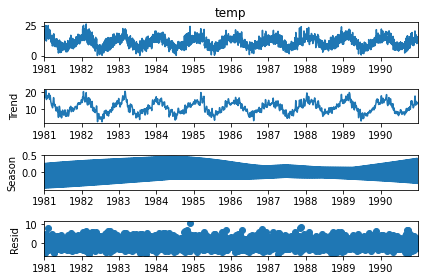

In [12]:
stl = STL(temp, seasonal =365)
res = stl.fit()
fig = res.plot()

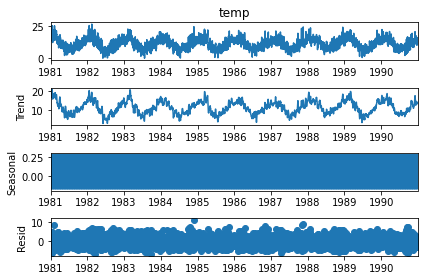

In [13]:
sd = seasonal_decompose(temp, model='additive')
fig = sd.plot()

# Group by Month

In [20]:
df_month = df.groupby(pd.Grouper(freq='M')).mean()

In [21]:
df_month.head(5)

,Temp
Date,
1981-01-31,17.712903
1981-02-28,17.678571
1981-03-31,13.500000
1981-04-30,12.356667
1981-05-31,9.490323


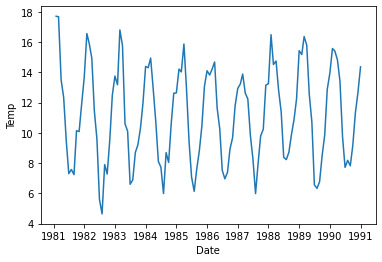

In [25]:
sns.lineplot(x=df_month.index, y=df_month.Temp)

In [26]:
tsa.adfuller(df_month.Temp)

(-1.8923126029292991,
 0.33568610206497645,
 13,
 106,
 {'1%': -3.4936021509366793,
  '5%': -2.8892174239808703,
  '10%': -2.58153320754717},
 314.6487162773361)

In [27]:
tsa.adfuller(df_month.Temp, regression='nc')

(0.0970203934762209,
 0.715607144368542,
 13,
 106,
 {'1%': -2.5871552545389815,
  '5%': -1.9438072306333416,
  '10%': -1.6145345885529665},
 316.7595392657927)

In [29]:
temp = pd.Series(data = list(df_month['Temp']), index= pd.date_range(df_month.index.min(), periods=len(df_month['Temp']), freq='M'), name='temp', dtype='float', copy=True)

In [30]:
temp

1981-01-31    17.712903
1981-02-28    17.678571
1981-03-31    13.500000
1981-04-30    12.356667
1981-05-31     9.490323
                ...    
1990-08-31     7.825806
1990-09-30     9.166667
1990-10-31    11.345161
1990-11-30    12.656667
1990-12-31    14.367742
Freq: M, Name: temp, Length: 120, dtype: float64

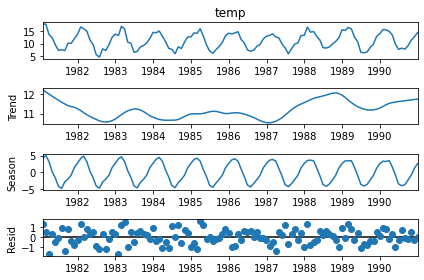

In [31]:
stl = STL(temp, seasonal =365)
res = stl.fit()
fig = res.plot()

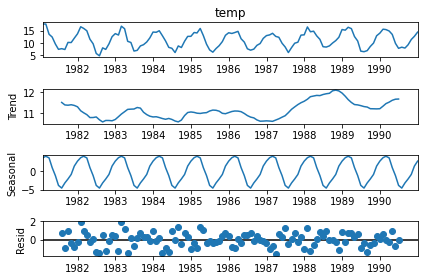

In [32]:
sd = seasonal_decompose(temp, model='additive')
fig = sd.plot()